# Import necessary libraries:

In [13]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# Loading datasets:

In [2]:

# Load training feature data
training_data = np.load("/content/train_feature.npz", allow_pickle=True)
train_features = training_data['features']
train_labels = training_data['label']

# Load validation feature data
validation_data = np.load("/content/valid_feature.npz", allow_pickle=True)
valid_features = validation_data['features']
valid_labels = validation_data['label']


Data Processing

In [3]:

# Ensure labels are in integer format
train_labels = train_labels.astype(int)  # Assumes classes are 0 and 1
valid_labels = valid_labels.astype(int)  # Assumes classes are 0 and 1

# Flatten the feature arrays from (samples, 13, 786) to (samples, 13 * 786)
num_train_samples = train_features.shape[0]
num_valid_samples = valid_features.shape[0]

flat_train_features = train_features.reshape(num_train_samples, -1)
flat_valid_features = valid_features.reshape(num_valid_samples, -1)

# Normalize the feature data
scaler = StandardScaler()
flat_train_features = scaler.fit_transform(flat_train_features)
flat_valid_features = scaler.transform(flat_valid_features)


# Using Logistic Regression:

Training with 20% of the data:
Validation Accuracy (Logistic Regression): 0.9530
Confusion Matrix:
 [[240  12]
 [ 11 226]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       252
           1       0.95      0.95      0.95       237

    accuracy                           0.95       489
   macro avg       0.95      0.95      0.95       489
weighted avg       0.95      0.95      0.95       489

-----

Training with 40% of the data:
Validation Accuracy (Logistic Regression): 0.9652
Confusion Matrix:
 [[245   7]
 [ 10 227]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       252
           1       0.97      0.96      0.96       237

    accuracy                           0.97       489
   macro avg       0.97      0.97      0.97       489
weighted avg       0.97      0.97      0.97       489

-----

Training with 60% of the data:
Validat

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

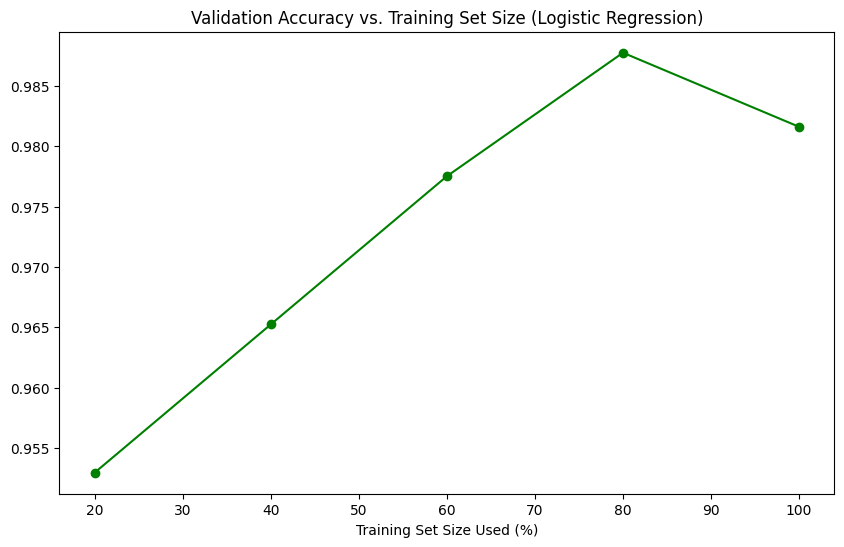

In [4]:
from sklearn.linear_model import LogisticRegression

# Different training set sizes to use (as percentages)
data_fractions = [0.2, 0.4, 0.6, 0.8, 1.0]
performance_scores_logreg = []

# Train and evaluate the model for each fraction of the training data
for fraction in data_fractions:
    # Determine the subset size
    subset_size = int(num_train_samples * fraction)
    subset_train_features = flat_train_features[:subset_size]
    subset_train_labels = train_labels[:subset_size]

    # Initialize and train the LogisticRegression model
    classifier = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)  # Adjust solver and max_iter if needed
    classifier.fit(subset_train_features, subset_train_labels)

    # Predict on the validation data
    valid_predictions = classifier.predict(flat_valid_features)

    # Measure the accuracy on the validation set
    accuracy = accuracy_score(valid_labels, valid_predictions)
    performance_scores_logreg.append(accuracy)

    # Output metrics for each training fraction
    print(f"Training with {int(fraction * 100)}% of the data:")
    print(f"Validation Accuracy (Logistic Regression): {accuracy:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(valid_labels, valid_predictions))
    print("Classification Report:\n", classification_report(valid_labels, valid_predictions))
    print("-----\n")

# Visualize the accuracy versus training data fraction for LogisticRegression
plt.figure(figsize=(10, 6))
plt.plot([int(f * 100) for f in data_fractions], performance_scores_logreg, marker='o', color='green')
plt.title("Validation Accuracy vs. Training Set Size (Logistic Regression)")
plt.xlabel("Training Set Size Used (%)")
plt


# Using K Nearest Neighbours:

Training with 20% of the data:
Validation Accuracy (KNN, Weighted & Tuned): 0.9530
Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Confusion Matrix:
 [[241  11]
 [ 12 225]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       252
           1       0.95      0.95      0.95       237

    accuracy                           0.95       489
   macro avg       0.95      0.95      0.95       489
weighted avg       0.95      0.95      0.95       489

-----

Training with 40% of the data:
Validation Accuracy (KNN, Weighted & Tuned): 0.9673
Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Confusion Matrix:
 [[244   8]
 [  8 229]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       252
           1       0.97      0.97      0.97       237

    accuracy                           0.97       489
   macro avg       0.9

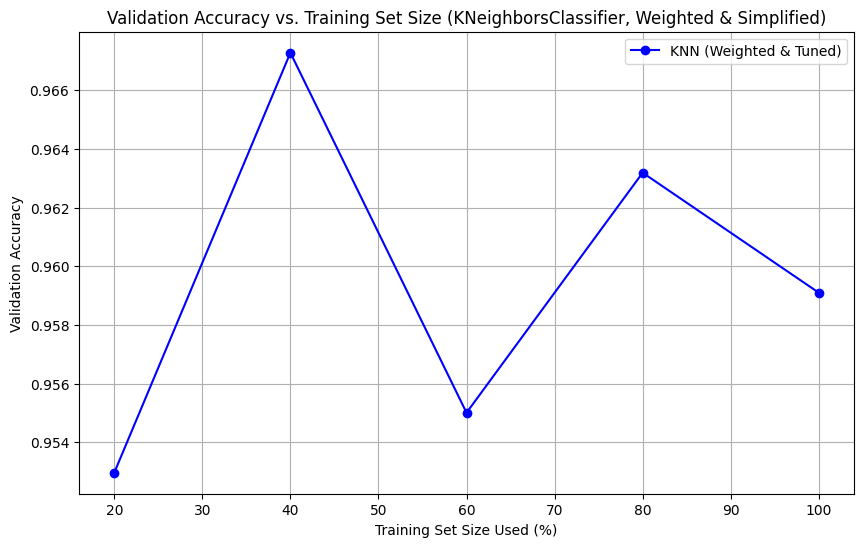

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Different training set sizes to use (as percentages)
data_fractions = [0.2, 0.4, 0.6, 0.8, 1.0]
performance_scores_knn = []

# Simplified hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [5, 7],  # Fewer neighbor options
    'weights': ['distance'],  # Only distance-based weighting
}

# Initialize GridSearchCV with KNeighborsClassifier
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')  # Reduced to 3-fold cross-validation

# Train and evaluate the model for each fraction of the training data
for fraction in data_fractions:
    # Determine the subset size
    subset_size = int(num_train_samples * fraction)
    subset_train_features = flat_train_features[:subset_size]
    subset_train_labels = train_labels[:subset_size]

    # Fit the KNeighborsClassifier using GridSearchCV for hyperparameter tuning
    grid_search_knn.fit(subset_train_features, subset_train_labels)

    # Get the best parameters after hyperparameter tuning
    best_knn = grid_search_knn.best_estimator_

    # Predict on the validation data
    valid_predictions = best_knn.predict(flat_valid_features)

    # Measure the accuracy on the validation set
    accuracy = accuracy_score(valid_labels, valid_predictions)
    performance_scores_knn.append(accuracy)

    # Output metrics for each training fraction
    print(f"Training with {int(fraction * 100)}% of the data:")
    print(f"Validation Accuracy (KNN, Weighted & Tuned): {accuracy:.4f}")
    print("Best Hyperparameters:", grid_search_knn.best_params_)
    print("Confusion Matrix:\n", confusion_matrix(valid_labels, valid_predictions))
    print("Classification Report:\n", classification_report(valid_labels, valid_predictions))
    print("-----\n")

# Visualize the accuracy versus training data fraction for KNeighborsClassifier
plt.figure(figsize=(10, 6))
plt.plot([int(f * 100) for f in data_fractions], performance_scores_knn, marker='o', color='blue', label='KNN (Weighted & Tuned)')
plt.title("Validation Accuracy vs. Training Set Size (KNeighborsClassifier, Weighted & Simplified)")
plt.xlabel("Training Set Size Used (%)")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.legend()
plt.show()


# Using SVC Classifier:

Training with 20% of the data:
Validation Accuracy: 0.9448
Confusion Matrix:
 [[241  11]
 [ 16 221]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       252
           1       0.95      0.93      0.94       237

    accuracy                           0.94       489
   macro avg       0.95      0.94      0.94       489
weighted avg       0.94      0.94      0.94       489

-----

Training with 40% of the data:
Validation Accuracy: 0.9673
Confusion Matrix:
 [[244   8]
 [  8 229]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       252
           1       0.97      0.97      0.97       237

    accuracy                           0.97       489
   macro avg       0.97      0.97      0.97       489
weighted avg       0.97      0.97      0.97       489

-----

Training with 60% of the data:
Validation Accuracy: 0.9714
Confusion Matrix:
 [[24

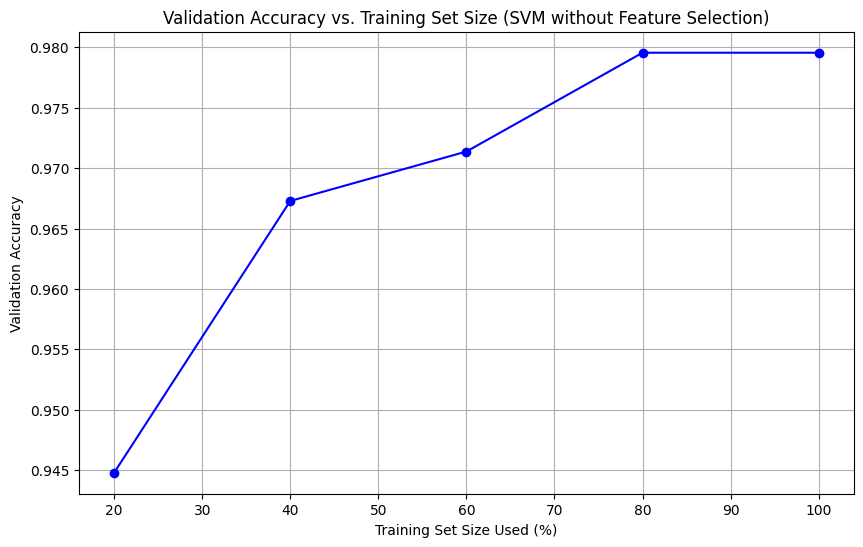

In [6]:

# Different training set sizes to use (as percentages)
data_fractions = [0.2, 0.4, 0.6, 0.8, 1.0]
performance_scores = []

# Train and evaluate the model for each fraction of the training data
for fraction in data_fractions:
    # Determine the subset size
    subset_size = int(num_train_samples * fraction)
    subset_train_features = flat_train_features[:subset_size]
    subset_train_labels = train_labels[:subset_size]

    # Initialize and train the SVM model
    classifier = SVC(kernel='linear', random_state=42)
    classifier.fit(subset_train_features, subset_train_labels)

    # Predict on the validation data
    valid_predictions = classifier.predict(flat_valid_features)

    # Measure the accuracy on the validation set
    accuracy = accuracy_score(valid_labels, valid_predictions)
    performance_scores.append(accuracy)

    # Output metrics for each training fraction
    print(f"Training with {int(fraction * 100)}% of the data:")
    print(f"Validation Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(valid_labels, valid_predictions))
    print("Classification Report:\n", classification_report(valid_labels, valid_predictions))
    print("-----\n")

# Visualize the accuracy versus training data fraction
plt.figure(figsize=(10, 6))
plt.plot([int(f * 100) for f in data_fractions], performance_scores, marker='o', color='blue')
plt.title("Validation Accuracy vs. Training Set Size (SVM without Feature Selection)")
plt.xlabel("Training Set Size Used (%)")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()


# Using Random Forest Classifer:

Training with 20% of the data:
Validation Accuracy: 0.96
Confusion Matrix:
 [[240  12]
 [  9 228]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       252
           1       0.95      0.96      0.96       237

    accuracy                           0.96       489
   macro avg       0.96      0.96      0.96       489
weighted avg       0.96      0.96      0.96       489

-----

Training with 40% of the data:
Validation Accuracy: 0.97
Confusion Matrix:
 [[244   8]
 [  6 231]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       252
           1       0.97      0.97      0.97       237

    accuracy                           0.97       489
   macro avg       0.97      0.97      0.97       489
weighted avg       0.97      0.97      0.97       489

-----

Training with 60% of the data:
Validation Accuracy: 0.98
Confusion Matrix:
 [[248   4]

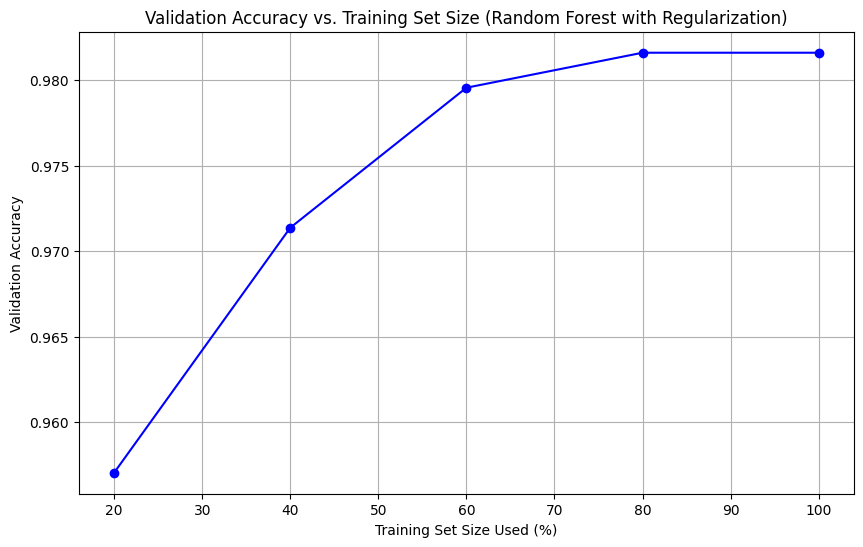

In [7]:


# Different fractions of the training data to utilize
data_fractions = [0.2, 0.4, 0.6, 0.8, 1.0]
model_accuracies = []

# Train and evaluate the model for each fraction of the training data
for fraction in data_fractions:
    # Determine the size of the subset
    subset_size = int(num_train_samples * fraction)
    subset_train_features = flat_train_features[:subset_size]
    subset_train_labels = train_labels[:subset_size]

    # Initialize and train the Random Forest model with regularization parameters
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,              # Maximum depth of each tree
        min_samples_split=5,       # Minimum samples required to split an internal node
        min_samples_leaf=2,        # Minimum number of samples required to be at a leaf node
        random_state=42
    )

    rf_model.fit(subset_train_features, subset_train_labels)

    # Predict on the validation data
    valid_predictions = rf_model.predict(flat_valid_features)

    # Measure the accuracy on the validation set
    accuracy = accuracy_score(valid_labels, valid_predictions)
    model_accuracies.append(accuracy)

    # Output metrics for each training fraction
    print(f"Training with {int(fraction * 100)}% of the data:")
    print(f"Validation Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:\n", confusion_matrix(valid_labels, valid_predictions))
    print("Classification Report:\n", classification_report(valid_labels, valid_predictions))
    print("-----\n")

# Visualize the accuracy versus training data fraction
plt.figure(figsize=(10, 6))
plt.plot([int(f * 100) for f in data_fractions], model_accuracies, marker='o', color='blue')
plt.title("Validation Accuracy vs. Training Set Size (Random Forest with Regularization)")
plt.xlabel("Training Set Size Used (%)")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()


# Combined overall plot:

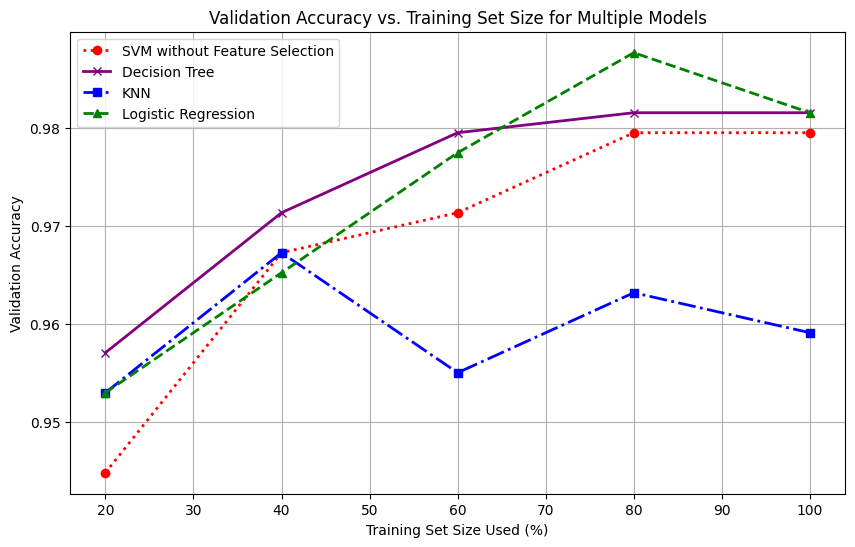

In [11]:
# Visualize the accuracy versus training data fraction for SVM, Decision Tree, KNN, and Logistic Regression
plt.figure(figsize=(10, 6))

# Plot for SVM without Feature Selection
plt.plot([int(f * 100) for f in data_fractions], performance_scores, marker='o', color='red', label='SVM without Feature Selection', linewidth=2, linestyle='dotted')

# Plot for Decision Tree
plt.plot([int(f * 100) for f in data_fractions], model_accuracies, marker='x', color='purple', label='Decision Tree', linewidth=2)

# Plot for KNeighborsClassifier
plt.plot([int(f * 100) for f in data_fractions], performance_scores_knn, marker='s', color='blue', label='KNN', linewidth=2, linestyle='dashdot')

# Plot for Logistic Regression
plt.plot([int(f * 100) for f in data_fractions], performance_scores_logreg, marker='^', color='green', label='Logistic Regression', linewidth=2, linestyle='dashed')

# Adding titles and labels
plt.title("Validation Accuracy vs. Training Set Size for Multiple Models")
plt.xlabel("Training Set Size Used (%)")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.legend()

# Show the combined plot
plt.show()


# Random Forest is taken as the ideal model  performing better at maximum instances.